# Elliptic Bitcoin Transactions Graph Dataset - Results
### <i>Experiment 2.0 - Boosting Algorithms vs Random Forest using Neighborhood Cleaning Rule (downsample)</i> 
<hr>

In [1]:
###### importing dependencies #############################################
import matplotlib.pyplot as plt
from cryptoaml.utils import read_pickle
from IPython.core.display import display, HTML
from cryptoaml.metrics import (
    results_table, 
    plot_metric_dist,
    plot_feature_imp,
    print_model_params, 
    plot_result_matrices,
    display_metrics_stats,
    elliptic_time_indexed_results
)

###### constants ##########################################################
N_features          = 15 # for feature importance N top/bottom
EXP_RESULT_PATH     = "persistence/experiment_2/results"
BENCHMARK_RESULTS   = "{}/{}".format(EXP_RESULT_PATH, "benchmark_model_results.pkl")
DEFAULT_RESULTS     = "{}/{}".format(EXP_RESULT_PATH, "defaults_models_results.pkl")
TUNED_RESULTS       = "{}/{}".format(EXP_RESULT_PATH, "tuned_models_results.pkl")

<a id='benchmark'></a>
## Benchmark Models

Experiment performed on the [elliptic dataset](https://www.kaggle.com/ellipticco/elliptic-data-set) [1,2]

Models were tested on the following feature sets:
- Local Features (LF)
- Local Features and Node Embeddings extracted from GCN (LF_NE) 
- All Features - Aggregated Features and Local Features (AF)
- All Features and Node Embeddings extracted from GCN (AF_NE) 

__Results obtained in the original paper [2]__

<table style="border-collapse:collapse;border-spacing:0;border-color:#ccc" class="tg"><tr><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:bold;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#333;background-color:#f0f0f0;text-align:center;vertical-align:top" rowspan="2"><br><br>Method<br></th><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:bold;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#333;background-color:#f0f0f0;text-align:center;vertical-align:top" colspan="3">Illicit</th><th style="font-family:Arial, sans-serif;font-size:14px;font-weight:bold;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#333;background-color:#f0f0f0;text-align:center;vertical-align:top">MicroAVG</th></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#333;background-color:#fff;font-weight:bold;text-align:center;vertical-align:top">Precision</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#333;background-color:#fff;font-weight:bold;text-align:center;vertical-align:top">Recall</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#333;background-color:#fff;font-weight:bold;text-align:center;vertical-align:top">F1</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#333;background-color:#fff;font-weight:bold;text-align:center;vertical-align:top">F1</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;color:#000000;background-color:#fff;text-align:center;vertical-align:top">LogReg <span style="font-style:italic">(AF)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.404</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.593</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.481</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.931</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;color:#000000;background-color:#fff;text-align:center;vertical-align:top">LogReg <span style="font-style:italic">(AF+NE)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.537</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.528</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.533</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:inherit;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.945</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">LogReg <span style="font-style:italic">(LF)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.348</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.668</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.457</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.920</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">LogReg <span style="font-style:italic">(LF+NE)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.518</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.571</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.543</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.945</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#34ff34;text-align:center;vertical-align:top">RF <span style="font-style:italic">(AF)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.956</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.670</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.788</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.977</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#34ff34;text-align:center;vertical-align:top">RF <span style="font-style:italic">(AF+NE)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#34ff34;text-align:center;vertical-align:top">0.971</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#333333;color:#000000;background-color:#34ff34;text-align:center;vertical-align:top">0.675</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#34ff34;text-align:center;vertical-align:top">0.796</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.978</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#34ff34;text-align:center;vertical-align:top">RF <span style="font-style:italic">(LF)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.803</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.611</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.694</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.966</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#34ff34;text-align:center;vertical-align:top">RF <span style="font-style:italic">(LF+NE)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.874</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.668</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.759</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.973</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">MLP (<span style="font-style:italic">AF</span>)</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.694</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.617</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.653</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.962</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">MLP <span style="font-style:italic">(AF+NE)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.780</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.617</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.689</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.967</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">MLP <span style="font-style:italic">(LF)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.637</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.662</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.649</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.958</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">MLP <span style="font-style:italic">(LF+NE)</span></td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.6819</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.5782</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.6258</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#34ff34;text-align:center;vertical-align:top">0.986</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">GCN</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.812</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.512</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.628</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.961</td></tr><tr><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">Skip-GCN</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.812</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.623</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.705</td><td style="font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#000000;color:#000000;background-color:#fff;text-align:center;vertical-align:top">0.966</td></tr></table>

<img width="100%" src="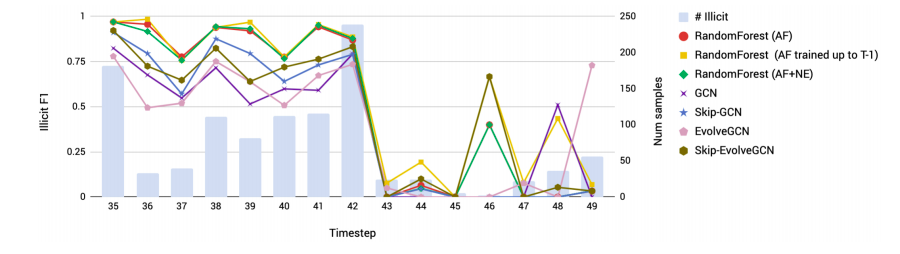
">

<small>
    <i>
   Illicit F1 results over test time span from benchmark paper [2].
    </i>
</small>

### Random Forest - Default Hyperparameters 

In [2]:
# load results for benchmark model
benchmark_model = "random_forest"
benchmark_results = read_pickle(BENCHMARK_RESULTS)

####  RF Suggested Hyperparameters - Evaluation Metrics

- <i>Precision</i> 
- <i>Recall</i> 
- <i>F1</i>
- <i>F1 Micro Avg/Accuracy<i/>
- AUC
    
<small>
    <i>
    Italics text refers to metrics which were used in the benchmark paper. The results reproduce are very close to the ones documented in the benchmark paper [2], shown in the previous section. In our test run we managed to obtain higher results using the same hyperparameters specified.
    </i>
</small>

In [3]:
# dataframe with all the perfomance metrics
print("Performance metrics for benchmark model")
benchmark_metrics_df = results_table(benchmark_results)
display(benchmark_metrics_df)

# sorted by f1 score
print("Performance metrics for benchmark model sorted by f1-score")
display(benchmark_metrics_df.sort_values("f1", ascending=False))

Performance metrics for benchmark model


,model,precision,recall,f1_micro,accuracy,auc,f1
0,random_forest_AF,0.940,0.725,0.979,0.979,0.861,0.819
1,random_forest_AF_NE,0.973,0.721,0.981,0.981,0.860,0.828


Performance metrics for benchmark model sorted by f1-score


,model,precision,recall,f1_micro,accuracy,auc,f1
1,random_forest_AF_NE,0.973,0.721,0.981,0.981,0.860,0.828
0,random_forest_AF,0.940,0.725,0.979,0.979,0.861,0.819


#### RF Default Hyperparameters - Evaluation Statistics

<i>Note: Since random forest is non-deterministic in nature, we ran the model for 100 iterations and averaged the results. This was done to insure robustness and was also recommended in previous studies.<i/>
    
Below we show statistics for the evaluation metrics.

'random_forest' on 'AF' feature set - performance metrics stats


,iteration,precision,recall,f1_micro,accuracy,auc,f1
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,0.939579,0.725439,0.979128,0.979128,0.861096,0.818719
std,29.011492,0.008149,0.002162,0.000424,0.000424,0.001046,0.003075
min,0.000000,0.921176,0.720222,0.977984,0.977984,0.858731,0.809943
25%,24.750000,0.933630,0.723915,0.978824,0.978824,0.860346,0.816576
50%,49.500000,0.940191,0.725762,0.979184,0.979184,0.861152,0.818988
75%,74.250000,0.945652,0.726685,0.979379,0.979379,0.861774,0.820847
max,99.000000,0.958486,0.730379,0.980264,0.980264,0.863553,0.827478


'random_forest' on 'AF_NE' feature set - performance metrics stats


,iteration,precision,recall,f1_micro,accuracy,auc,f1
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,0.973324,0.721025,0.980591,0.980591,0.859825,0.828382
std,29.011492,0.004253,0.002499,0.000228,0.000228,0.001222,0.001939
min,0.000000,0.958637,0.714681,0.979844,0.979844,0.856603,0.822785
25%,24.750000,0.970462,0.719298,0.980444,0.980444,0.858975,0.827202
50%,49.500000,0.973750,0.721145,0.980624,0.980624,0.859819,0.828465
75%,74.250000,0.976198,0.722299,0.980744,0.980744,0.860620,0.829787
max,99.000000,0.983648,0.728532,0.981164,0.981164,0.863496,0.832801


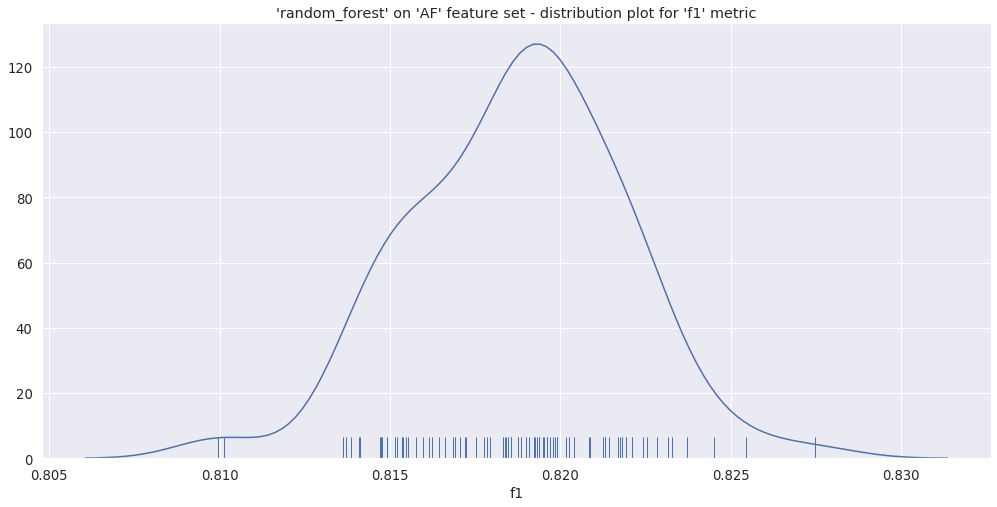

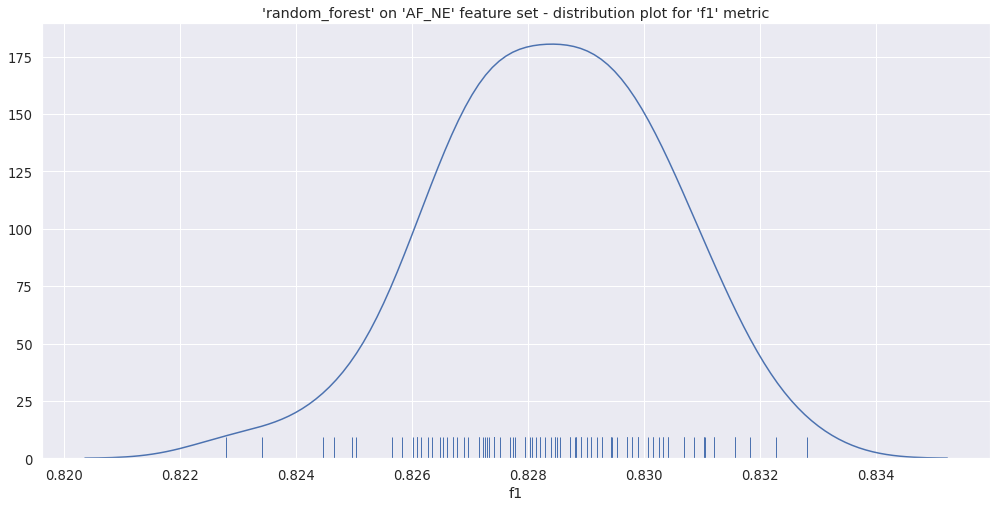

In [4]:
# display stats for each metric for benchmark model over 100 runs
display_metrics_stats(benchmark_results)

# plot f1 score distribution for benchmark model over 100 runs
plot_metric_dist(benchmark_results, "f1", figsize=(17,8))

####  RF Default Hyperparameters - Confusion Matrix

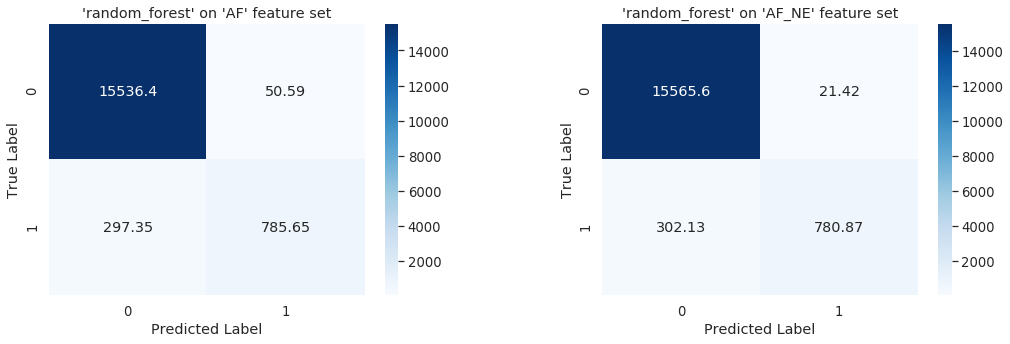

In [5]:
plot_result_matrices(benchmark_results, figsize=(17,5))

####  RF Default Hyperparameters - F1 Results over Test Span

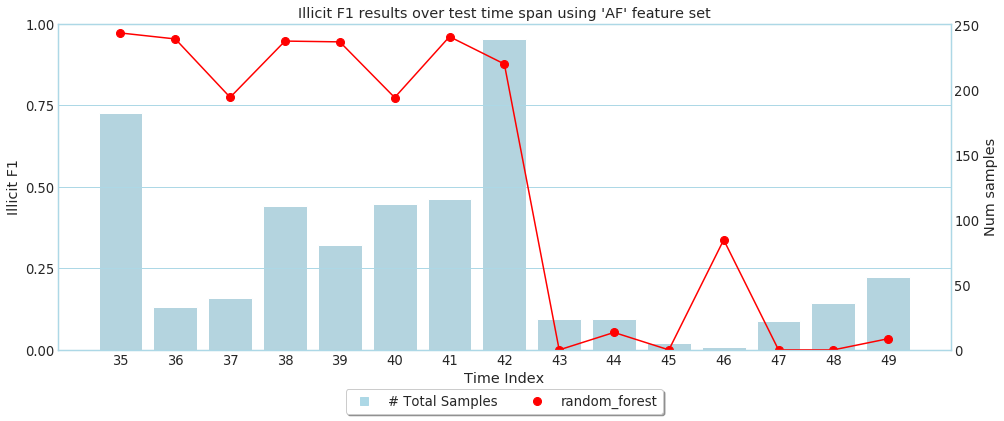

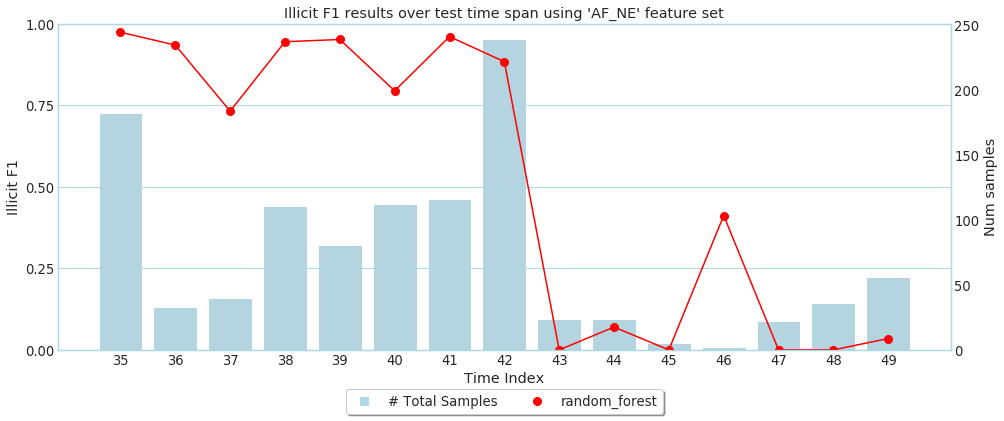

In [6]:
elliptic_time_indexed_results(benchmark_results)

####  RF Default Hyperparameters - Feature Importance

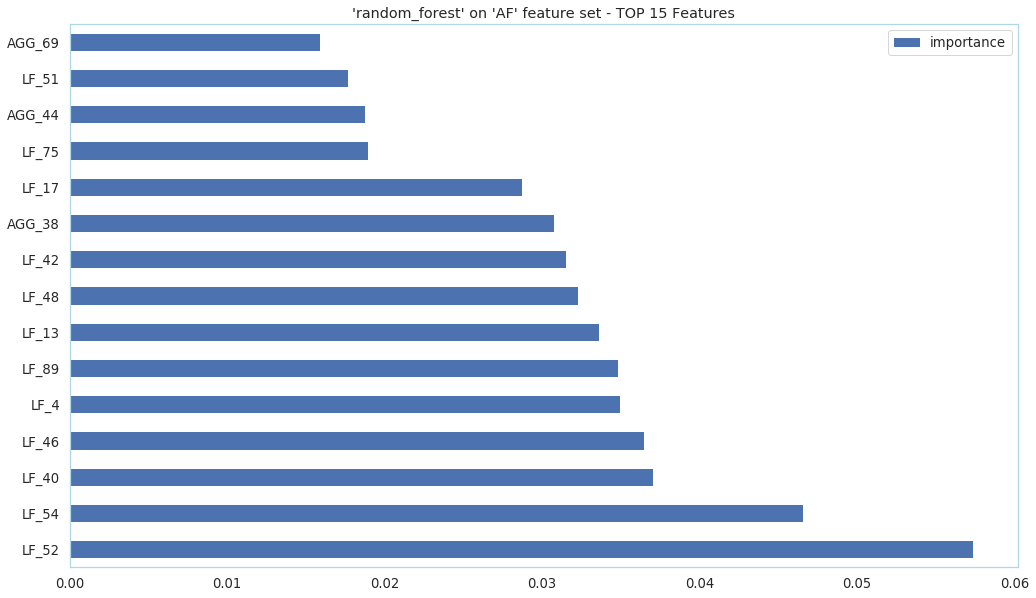

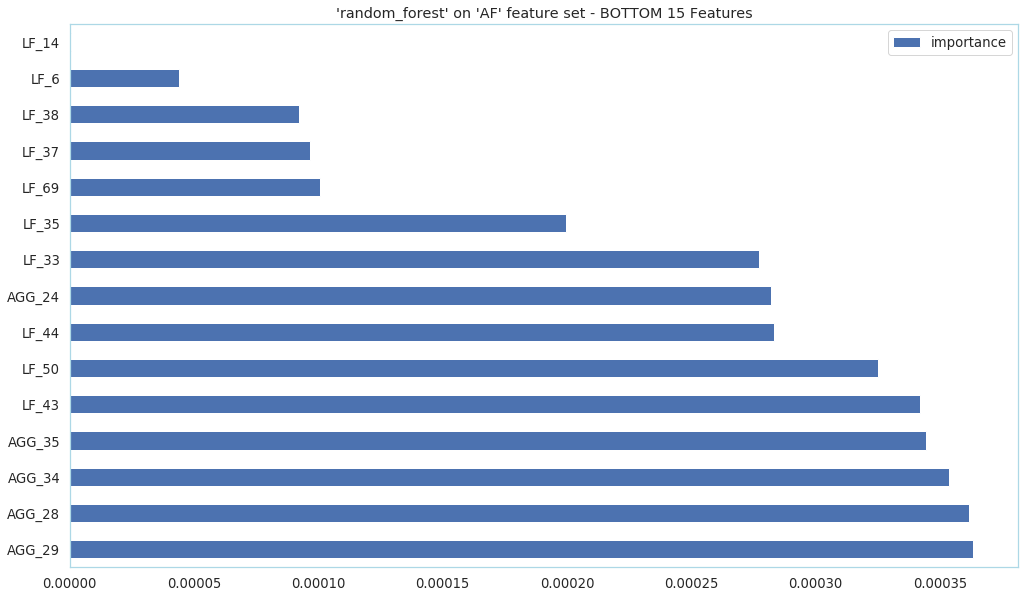

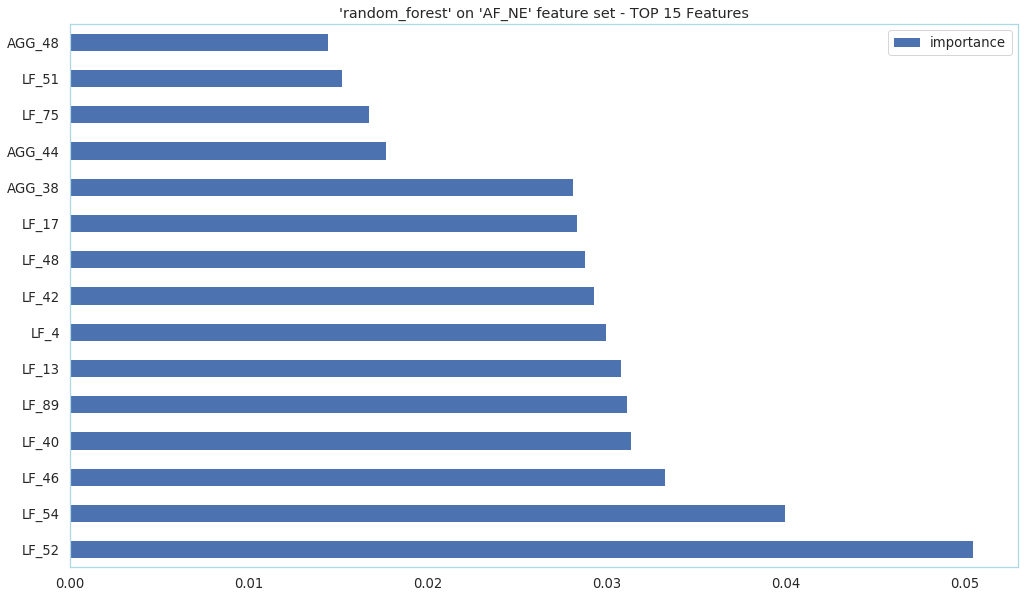

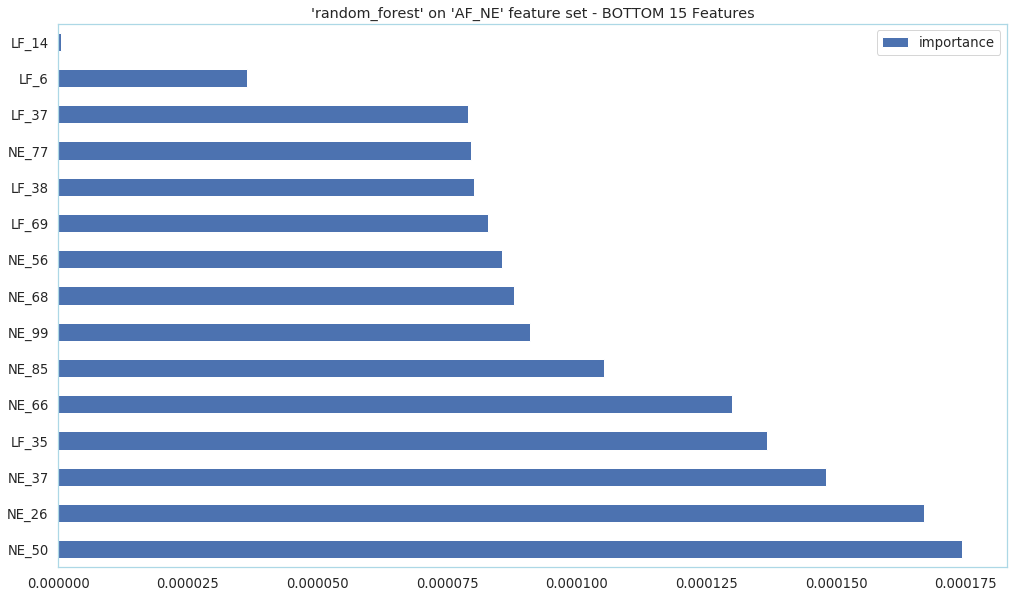

In [7]:
plot_feature_imp(benchmark_results, N_features)

####  RF Default Hyperparameters - Hyperparameters


In [8]:
print_model_params(benchmark_results)

Parameters used for 'random_forest' on 'AF' feature set
{   'bootstrap': True,
    'ccp_alpha': 0.0,
    'class_weight': None,
    'criterion': 'gini',
    'max_depth': None,
    'max_features': 'auto',
    'max_leaf_nodes': None,
    'max_samples': None,
    'min_impurity_decrease': 0.0,
    'min_impurity_split': None,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'min_weight_fraction_leaf': 0.0,
    'n_estimators': 100,
    'n_jobs': 16,
    'oob_score': False,
    'random_state': None,
    'verbose': 0,
    'warm_start': False}


Parameters used for 'random_forest' on 'AF_NE' feature set
{   'bootstrap': True,
    'ccp_alpha': 0.0,
    'class_weight': None,
    'criterion': 'gini',
    'max_depth': None,
    'max_features': 'auto',
    'max_leaf_nodes': None,
    'max_samples': None,
    'min_impurity_decrease': 0.0,
    'min_impurity_split': None,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'min_weight_fraction_leaf': 0.0,
    'n_estimators': 100,
    'n_jobs': 16,
    'oob_score': False,
    'random_state': None,
    'verbose': 0,
    'warm_start': False}


## Boosting Algorithms
- [XGBoost: eXtreme Gradient Boosting](https://xgboost.readthedocs.io/en/latest/) 
- [LightGBM: Light Gradient Boosting Machine](https://lightgbm.readthedocs.io/en/latest/) 
- [CatBoost](https://catboost.ai/) 

### Boosting Algorithms - Default Hyperparameters 

In [9]:
default_results = read_pickle(DEFAULT_RESULTS)

#### Boosting Default Hyperparameters - Evaluation Metrics
- <i>Precision</i> 
- <i>Recall</i> 
- <i>F1</i>
- <i>F1 Micro Avg/Accuracy<i/>
- AUC
    
<small>
    <i>
    Italics text refers to metrics which were used in the benchmark paper.
    </i>
</small>

In [10]:
print("Performance metrics for defaults boosting models")
defaults_metrics_df = results_table(default_results)
display(defaults_metrics_df)

print("Performance metrics for defaults boosting models sorted by f1-score")
display(defaults_metrics_df.sort_values("f1", ascending=False))

Performance metrics for defaults boosting models


,model,precision,recall,f1_micro,accuracy,auc,f1
0,xg_boost_AF,0.911,0.724,0.977,0.977,0.859,0.807
1,xg_boost_AF_NE,0.966,0.699,0.979,0.979,0.849,0.811
2,light_boost_AF,0.905,0.724,0.977,0.977,0.859,0.805
3,light_boost_AF_NE,0.974,0.700,0.979,0.979,0.849,0.815
4,cat_boost_AF,0.934,0.727,0.979,0.979,0.862,0.817
5,cat_boost_AF_NE,0.979,0.698,0.979,0.979,0.849,0.815


Performance metrics for defaults boosting models sorted by f1-score


,model,precision,recall,f1_micro,accuracy,auc,f1
4,cat_boost_AF,0.934,0.727,0.979,0.979,0.862,0.817
3,light_boost_AF_NE,0.974,0.700,0.979,0.979,0.849,0.815
5,cat_boost_AF_NE,0.979,0.698,0.979,0.979,0.849,0.815
1,xg_boost_AF_NE,0.966,0.699,0.979,0.979,0.849,0.811
0,xg_boost_AF,0.911,0.724,0.977,0.977,0.859,0.807
2,light_boost_AF,0.905,0.724,0.977,0.977,0.859,0.805


#### Boosting Default Hyperparameters - Confusion Matrices

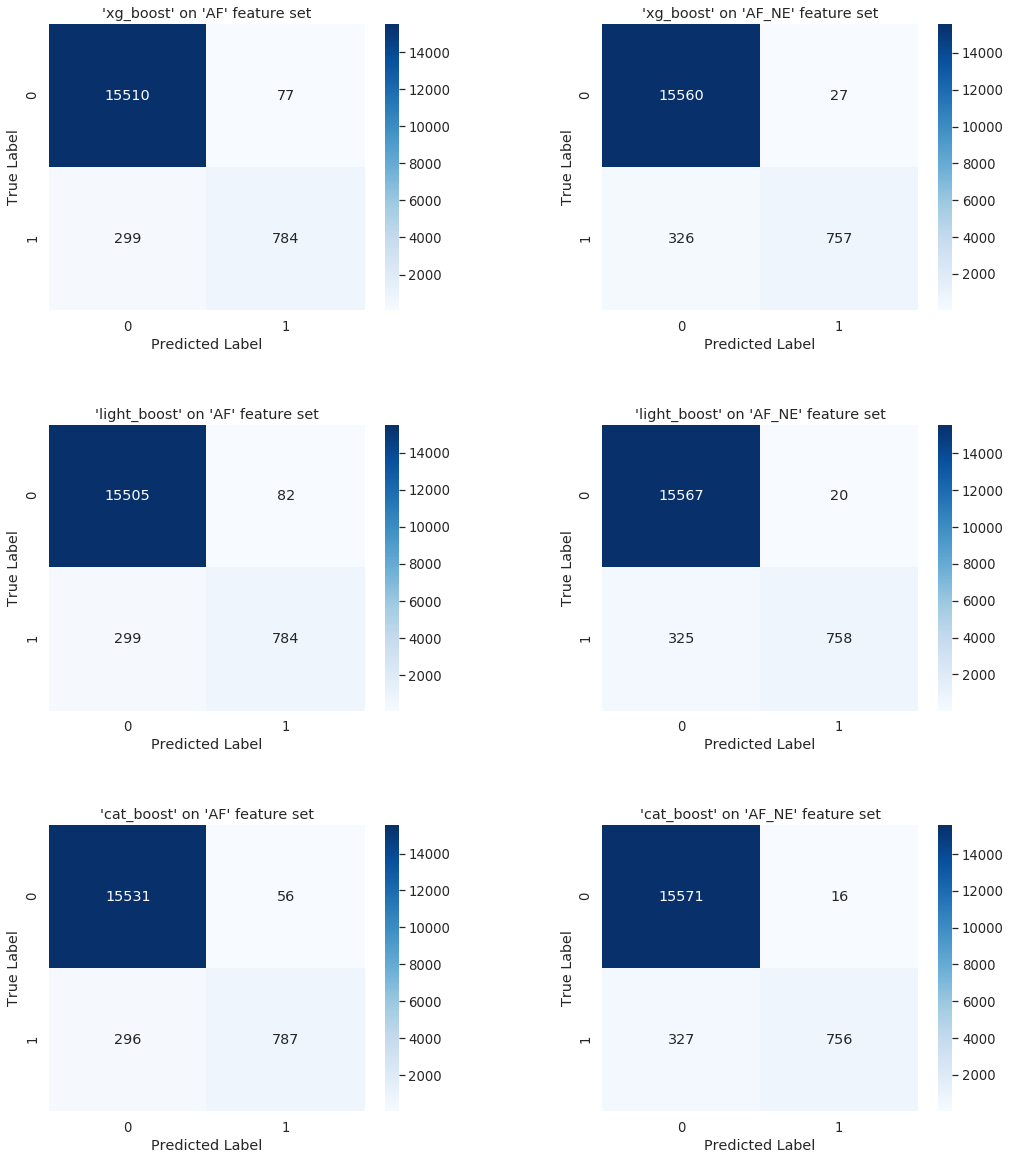

In [12]:
plot_result_matrices(default_results, figsize=(17,20))

#### Boosting Default Hyperparameters - F1 Results over Test Span

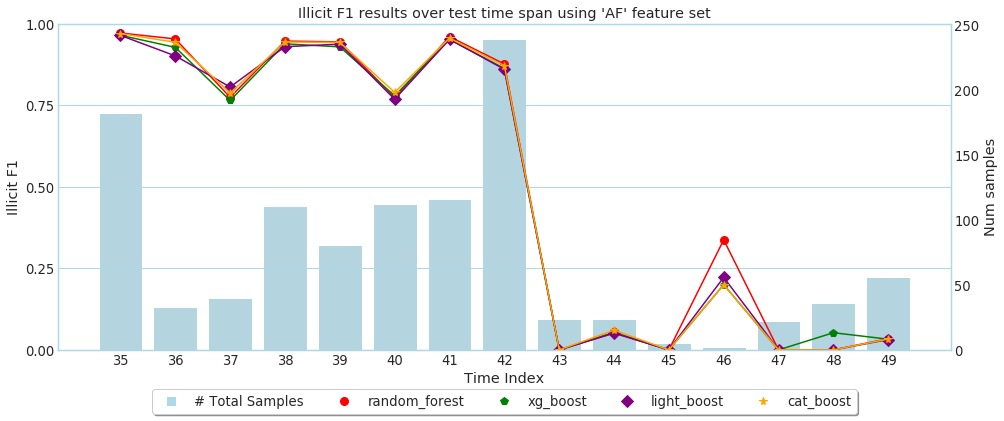

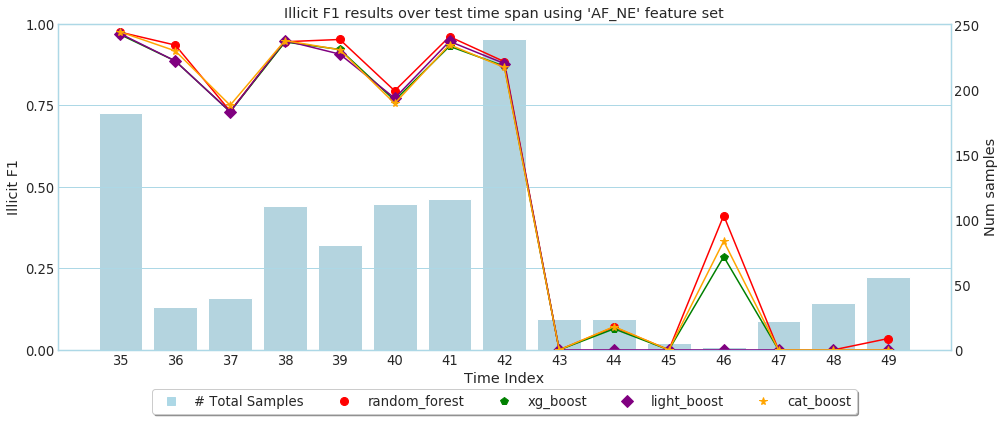

In [13]:
# in this plot we also display benchmark model
tmp_results = {**benchmark_results, **default_results}
elliptic_time_indexed_results(tmp_results)

#### Boosting Default Hyperparameters - Feature Importance

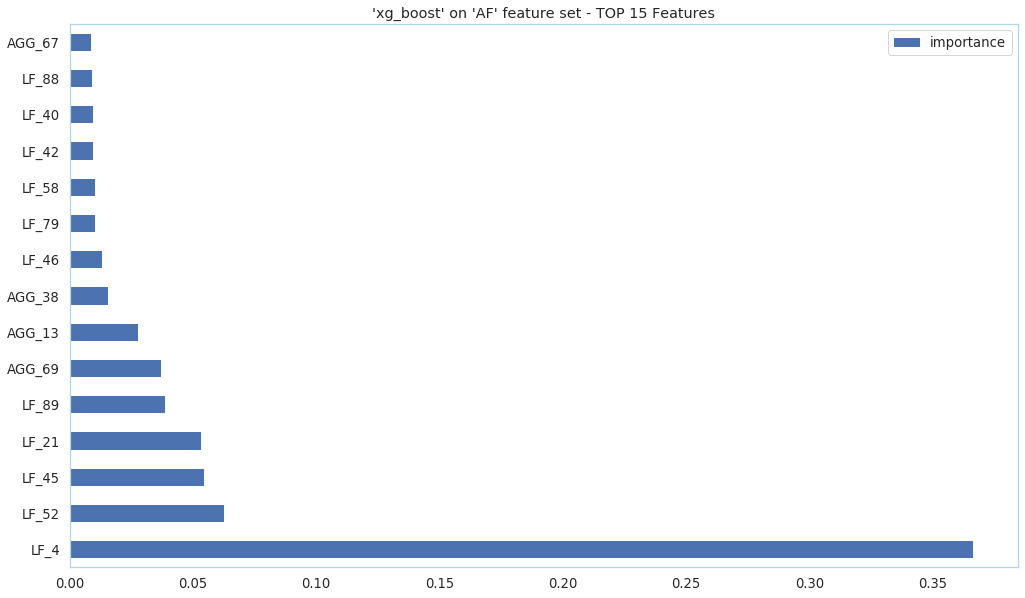

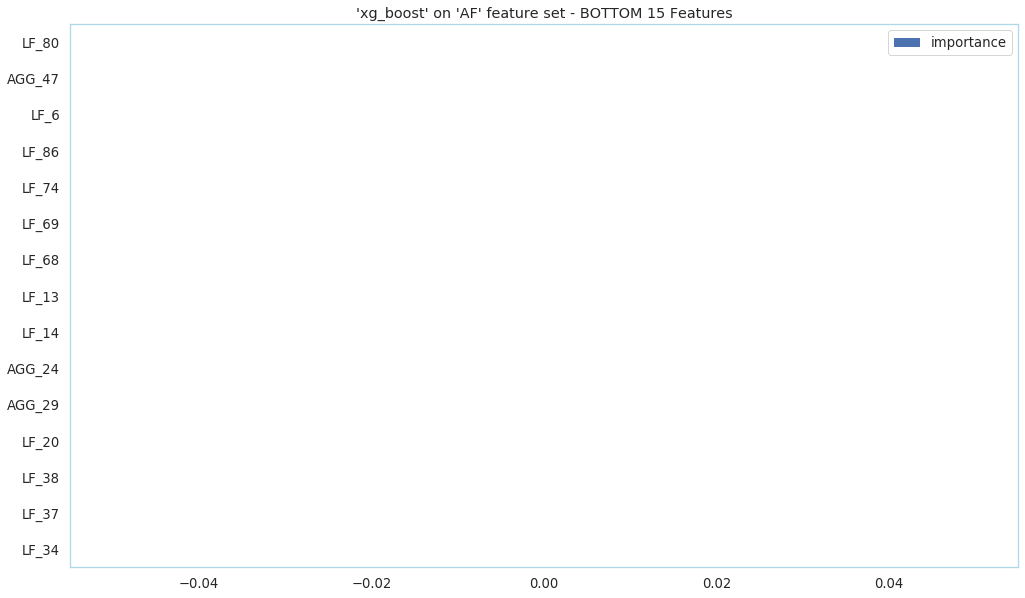

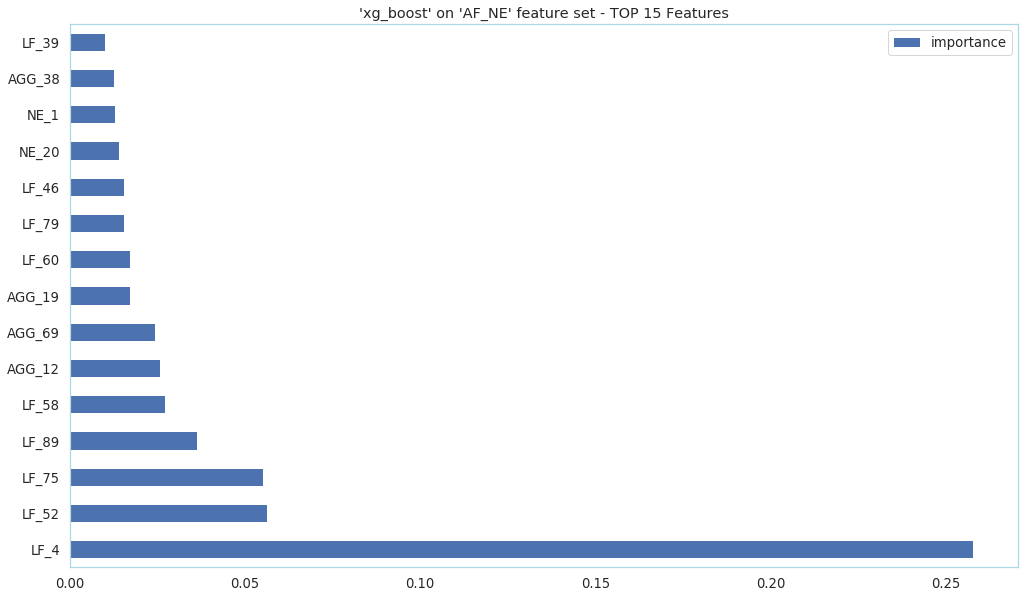

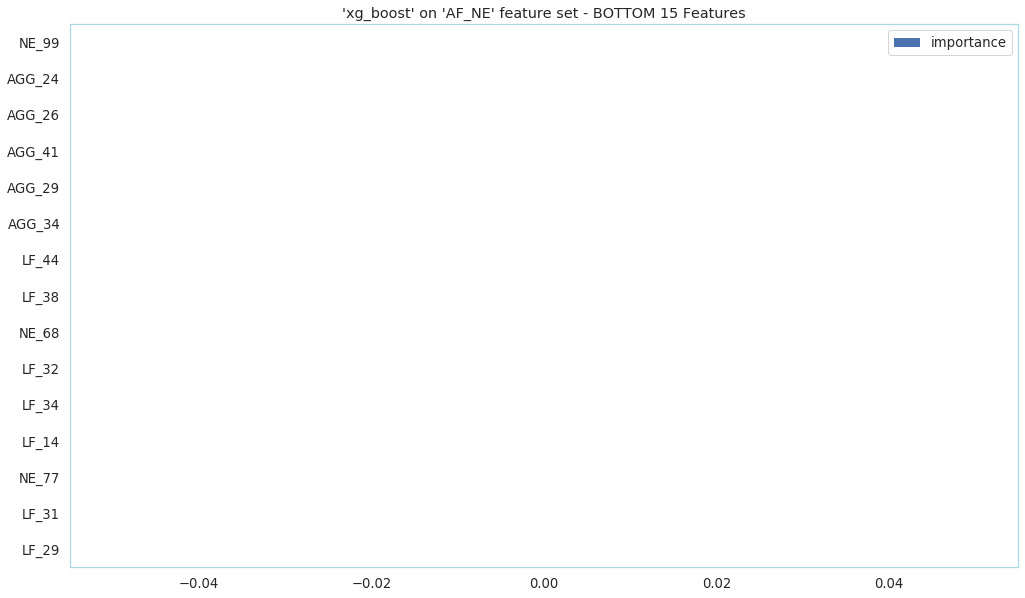

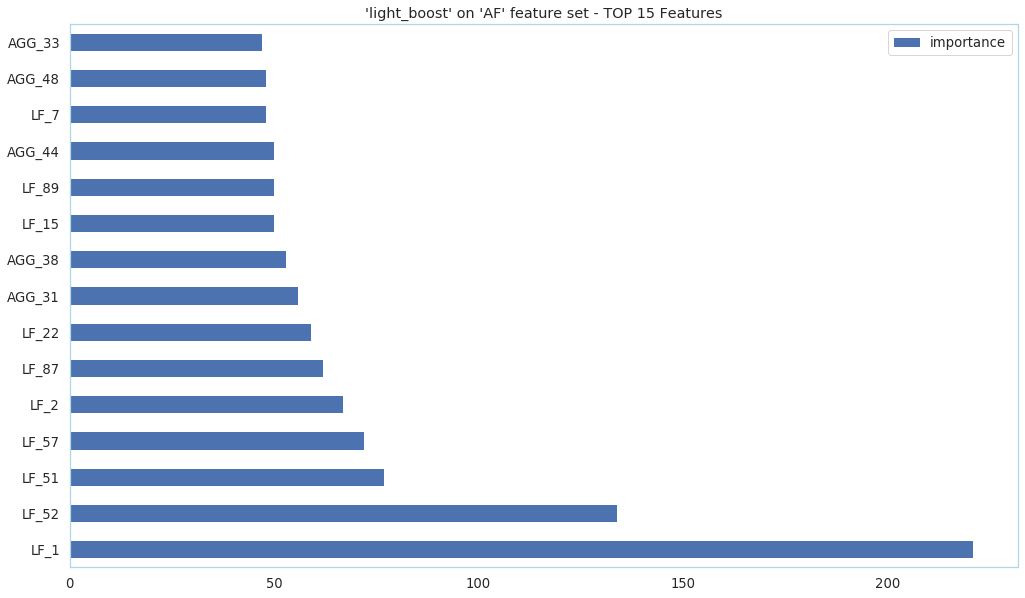

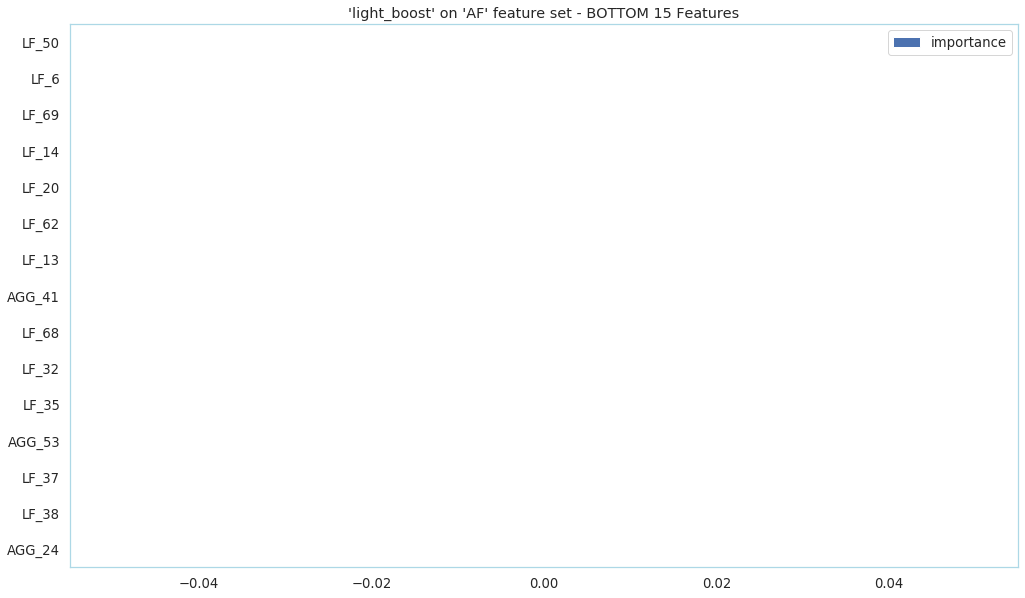

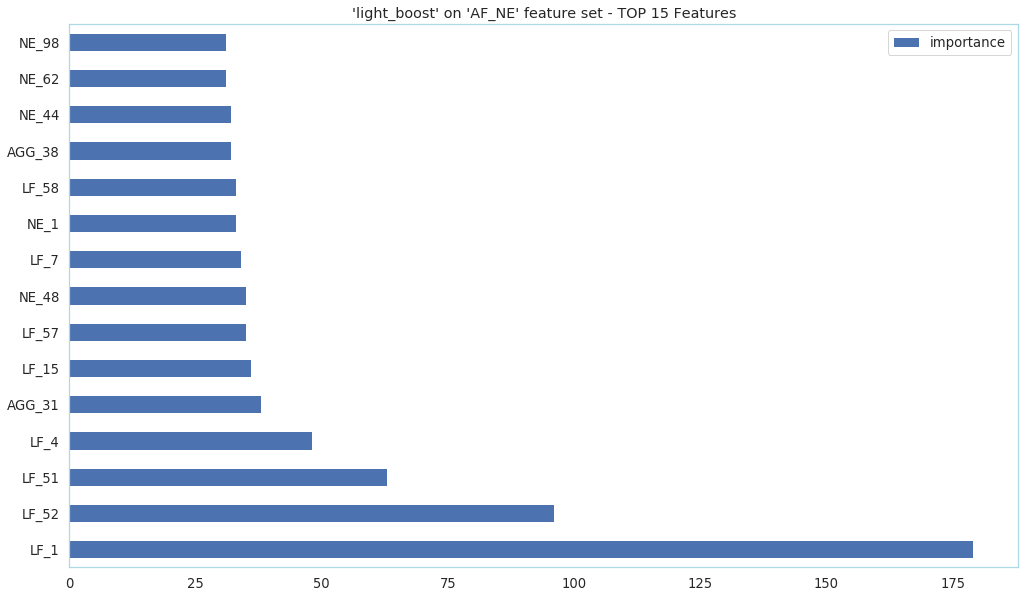

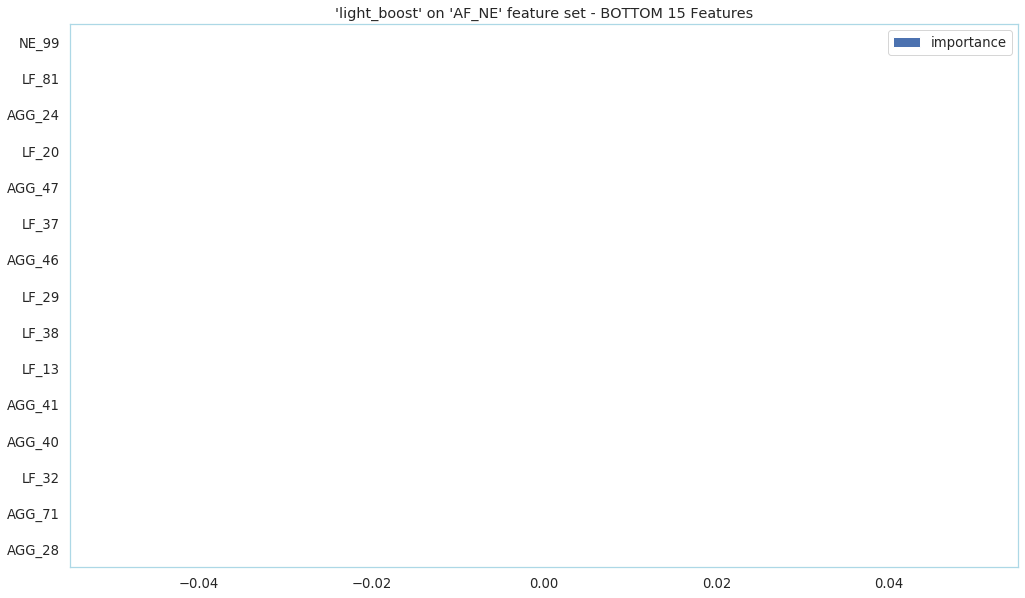

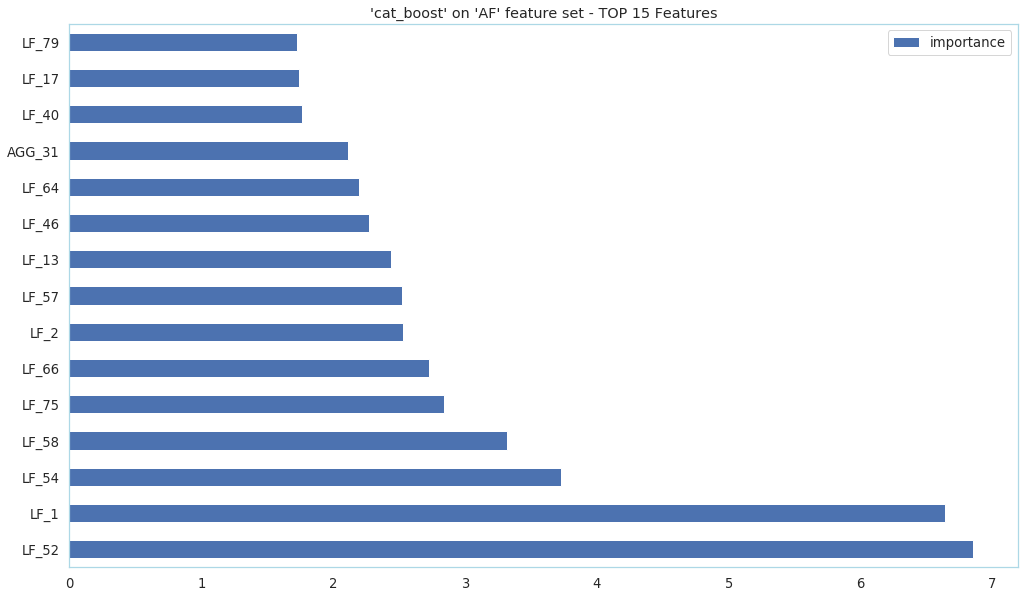

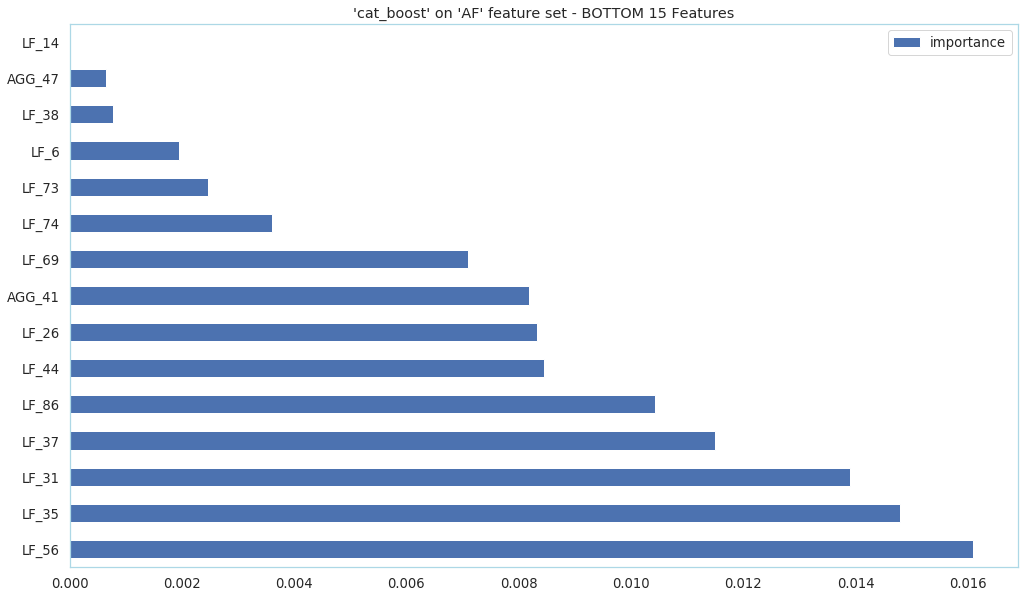

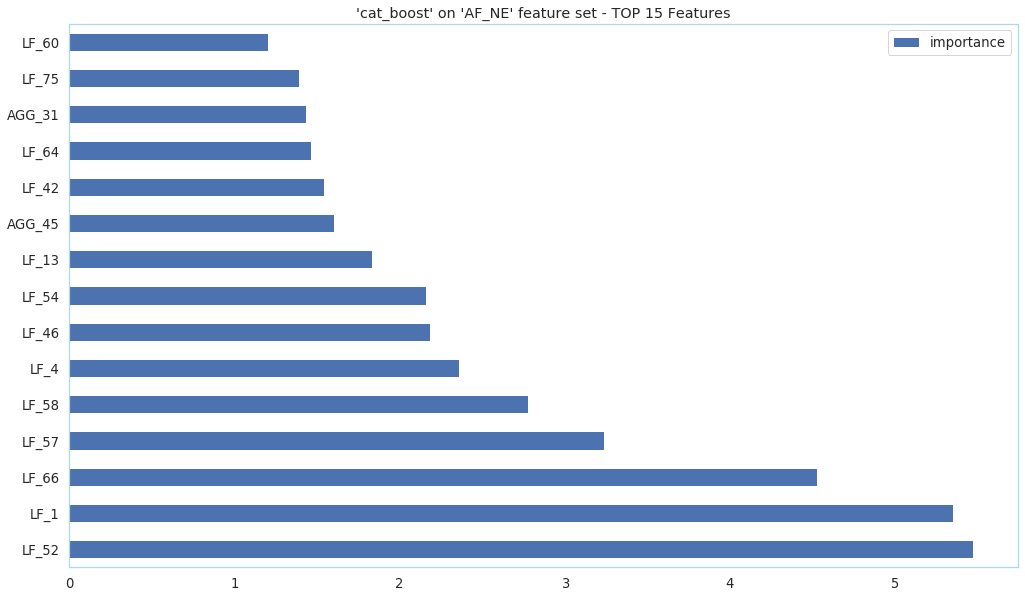

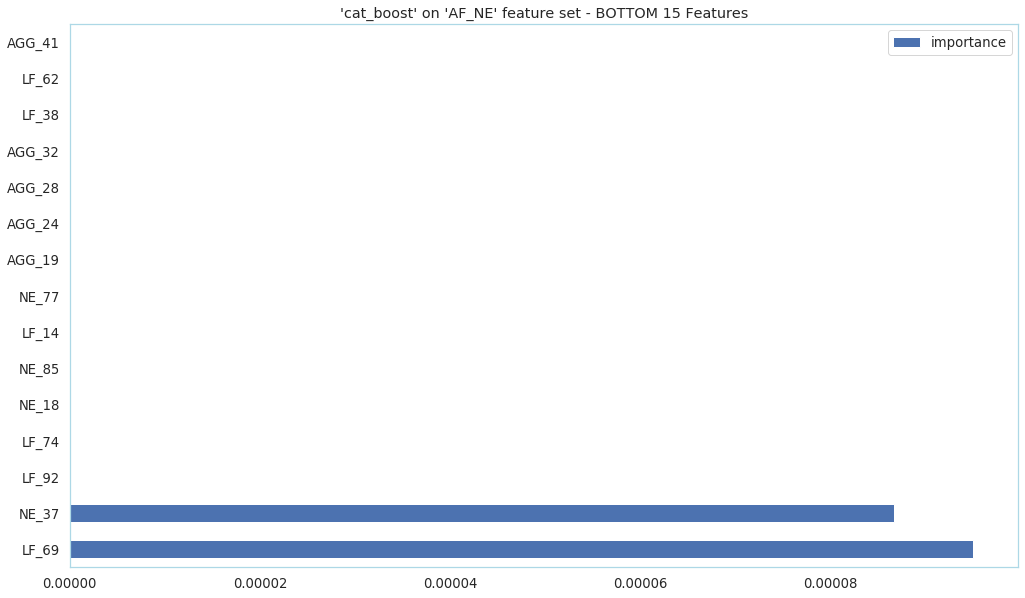

In [14]:
plot_feature_imp(default_results, N_features)

#### Boosting Default Hyperparameters - Hyperparameters

In [15]:
print_model_params(default_results)

Parameters used for 'xg_boost' on 'AF' feature set
{   'base_score': 0.5,
    'booster': None,
    'colsample_bylevel': 1,
    'colsample_bynode': 1,
    'colsample_bytree': 1,
    'gamma': 0,
    'gpu_id': -1,
    'importance_type': 'gain',
    'interaction_constraints': None,
    'learning_rate': 0.300000012,
    'max_delta_step': 0,
    'max_depth': 6,
    'min_child_weight': 1,
    'missing': nan,
    'monotone_constraints': None,
    'n_estimators': 100,
    'n_jobs': 16,
    'num_parallel_tree': 1,
    'objective': 'binary:logistic',
    'random_state': 0,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'scale_pos_weight': 1,
    'subsample': 1,
    'tree_method': None,
    'validate_parameters': False,
    'verbosity': None}


Parameters used for 'xg_boost' on 'AF_NE' feature set
{   'base_score': 0.5,
    'booster': None,
    'colsample_bylevel': 1,
    'colsample_bynode': 1,
    'colsample_bytree': 1,
    'gamma': 0,
    'gpu_id': -1,
    'importance_type': 'gain',
    'interaction_constraints': None,
    'learning_rate': 0.300000012,
    'max_delta_step': 0,
    'max_depth': 6,
    'min_child_weight': 1,
    'missing': nan,
    'monotone_constraints': None,
    'n_estimators': 100,
    'n_jobs': 16,
    'num_parallel_tree': 1,
    'objective': 'binary:logistic',
    'random_state': 0,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'scale_pos_weight': 1,
    'subsample': 1,
    'tree_method': None,
    'validate_parameters': False,
    'verbosity': None}


Parameters used for 'light_boost' on 'AF' feature set
{   'boosting_type': 'gbdt',
    'class_weight': None,
    'colsample_bytree': 1.0,
    'importance_type': 'split',
    'learning_rate': 0.1,
    'max_depth': -1,
    'min_child_samples': 20,
    'min_child_weight': 0.001,
    'min_split_gain': 0.0,
    'n_estimators': 100,
    'n_jobs': 16,
    'num_leaves': 31,
    'objective': None,
    'random_state': None,
    'reg_alpha': 0.0,
    'reg_lambda': 0.0,
    'silent': True,
    'subsample': 1.0,
    'subsample_for_bin': 200000,
    'subsample_freq': 0}


Parameters used for 'light_boost' on 'AF_NE' feature set
{   'boosting_type': 'gbdt',
    'class_weight': None,
    'colsample_bytree': 1.0,
    'importance_type': 'split',
    'learning_rate': 0.1,
    'max_depth': -1,
    'min_child_samples': 20,
    'min_child_weight': 0.001,
    'min_split_gain': 0.0,
    'n_estimators': 100,
    'n_jobs': 16,
    'num_leaves': 31,
    'objective': None,
    'random_state': None,
    'reg_alpha': 0.0,
    'reg_lambda': 0.0,
    'silent': True,
    'subsample': 1.0,
    'subsample_for_bin': 200000,
    'subsample_freq': 0}


Parameters used for 'cat_boost' on 'AF' feature set
{   'bayesian_matrix_reg': 0.10000000149011612,
    'best_model_min_trees': 1,
    'boost_from_average': False,
    'boosting_type': 'Plain',
    'bootstrap_type': 'MVS',
    'border_count': 254,
    'class_names': [0, 1],
    'classes_count': 0,
    'depth': 6,
    'eval_metric': 'Logloss',
    'feature_border_type': 'GreedyLogSum',
    'grow_policy': 'SymmetricTree',
    'iterations': 1000,
    'l2_leaf_reg': 3,
    'leaf_estimation_backtracking': 'AnyImprovement',
    'leaf_estimation_iterations': 10,
    'leaf_estimation_method': 'Newton',
    'learning_rate': 0.04319100081920624,
    'loss_function': 'Logloss',
    'max_leaves': 64,
    'min_data_in_leaf': 1,
    'model_shrink_mode': 'Constant',
    'model_shrink_rate': 0,
    'model_size_reg': 0.5,
    'nan_mode': 'Min',
    'penalties_coefficient': 1,
    'random_seed': 0,
    'random_strength': 1,
    'rsm': 1,
    'sampling_frequency': 'PerTree',
    'score_function': 'Cosine

Parameters used for 'cat_boost' on 'AF_NE' feature set
{   'bayesian_matrix_reg': 0.10000000149011612,
    'best_model_min_trees': 1,
    'boost_from_average': False,
    'boosting_type': 'Plain',
    'bootstrap_type': 'MVS',
    'border_count': 254,
    'class_names': [0, 1],
    'classes_count': 0,
    'depth': 6,
    'eval_metric': 'Logloss',
    'feature_border_type': 'GreedyLogSum',
    'grow_policy': 'SymmetricTree',
    'iterations': 1000,
    'l2_leaf_reg': 3,
    'leaf_estimation_backtracking': 'AnyImprovement',
    'leaf_estimation_iterations': 10,
    'leaf_estimation_method': 'Newton',
    'learning_rate': 0.04319100081920624,
    'loss_function': 'Logloss',
    'max_leaves': 64,
    'min_data_in_leaf': 1,
    'model_shrink_mode': 'Constant',
    'model_shrink_rate': 0,
    'model_size_reg': 0.5,
    'nan_mode': 'Min',
    'penalties_coefficient': 1,
    'random_seed': 0,
    'random_strength': 1,
    'rsm': 1,
    'sampling_frequency': 'PerTree',
    'score_function': 'Cos